# Feature Importance In The Iris Dataset

This notebook illustrates finding feature importance in the Iris dataset.

The main point it shows is using ``pandas`` structures throughout the code.

## Loading The Data 

First we load the dataset into a ``pandas.DataFrame``.

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
sns.set_style('whitegrid')

from ibex.sklearn import ensemble as pd_ensemble

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
iris = datasets.load_iris()
features = iris['feature_names']
iris = pd.DataFrame(
    np.c_[iris['data'], iris['target']], 
    columns=features+['class'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Finding Feature Importance

Now that all the data is in a ``DataFrame``, we can use the ``feature_importances_`` attribute of a gradient boosting classifier. Note that in Ibex, this is a ``pandas.Series``.

In [3]:
pd_ensemble.GradientBoostingClassifier().fit(iris[features], iris['class']).feature_importances_

sepal length (cm)    0.067194
sepal width (cm)     0.106643
petal length (cm)    0.331472
petal width (cm)     0.421357
dtype: float64

Since the result is a ``Series``, we can use its ``plot`` method directly, and it will handle all labels for us.

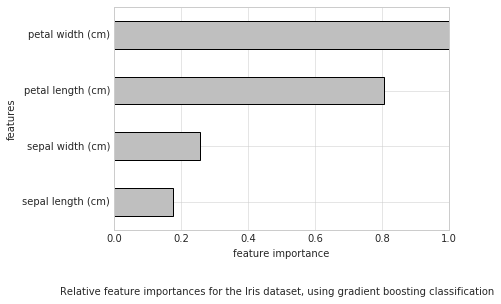

In [4]:
importances = pd_ensemble.GradientBoostingClassifier().fit(iris[features], iris['class']).feature_importances_
(importances / importances.max()).plot(kind='barh', color='0.75');
xlabel('feature importance');
ylabel('features');
figtext(
    0, 
    -0.1, 
    'Relative feature importances for the Iris dataset, using gradient boosting classification');